<a href="https://colab.research.google.com/github/weeebdev/ds509/blob/master/HA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !git clone --recurse-submodules https://github.com/getalp/wikIR.git
# !pip install -r ./wikIR/requirements.txt
# !pip install git+https://github.com/dorianbrown/rank_bm25.git
# !git clone https://github.com/NTMC-Community/MatchZoo.git
# !cd MatchZoo && python ./setup.py install
# !cd wikIR && python wikiextractor/WikiExtractor.py input --output - --bytes 100G --links --quiet --json > output.json

In [1]:
!pip3 install zenodo_get

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=19097ad3d0ed0807e889ca2ff9adad29afb37cca0d6589f6feb8ca56d560a703
  Stored in directory: /home/codespace/.cache/pip/wheels/46/78/0e/8e5e2b500f83a682c8d7e7ce820638cf99faa894a662f71cf0
Successfully built wget

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python -m pip install --upgrade pip


In [2]:
!zenodo_get 10.5281/zenodo.3565761

Title: ENwikIR1k
Keywords: 
Publication date: 2019-11-18
DOI: 10.5281/zenodo.3565761
Total size: 157.4 MB

Link: https://zenodo.org/api/files/3cb30747-c60b-47b2-b3a3-33f546356f99/wikIR1k.zip   size: 157.4 MB
100% [..................................................] 164995559 / 164995559
Checksum is correct. (554299bca984640cb283d6ba55753608)
All files have been downloaded.


In [6]:
!unzip wikIR1k.zip

Archive:  wikIR1k.zip
   creating: wikIR1k/
  inflating: wikIR1k/documents.csv   
   creating: wikIR1k/training/
  inflating: wikIR1k/training/queries.csv  
  inflating: wikIR1k/training/qrels  
  inflating: wikIR1k/training/BM25.res  
  inflating: wikIR1k/training/BM25.qrels.csv  
  inflating: wikIR1k/training/BM25.metrics.json  
   creating: wikIR1k/validation/
  inflating: wikIR1k/validation/queries.csv  
  inflating: wikIR1k/validation/qrels  
  inflating: wikIR1k/validation/BM25.res  
  inflating: wikIR1k/validation/BM25.qrels.csv  
  inflating: wikIR1k/validation/BM25.metrics.json  
   creating: wikIR1k/test/
  inflating: wikIR1k/test/queries.csv  
  inflating: wikIR1k/test/qrels      
  inflating: wikIR1k/test/BM25.res   
  inflating: wikIR1k/test/BM25.qrels.csv  
  inflating: wikIR1k/test/BM25.metrics.json  


In [2]:
!wget "https://gist.githubusercontent.com/sebleier/554280/raw/7e0e4a1ce04c2bb7bd41089c9821dbcf6d0c786c/NLTK's%2520list%2520of%2520english%2520stopwords"

--2023-01-31 05:33:13--  https://gist.githubusercontent.com/sebleier/554280/raw/7e0e4a1ce04c2bb7bd41089c9821dbcf6d0c786c/NLTK's%2520list%2520of%2520english%2520stopwords
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 622 [text/plain]
Saving to: ‘NLTK's list of english stopwords.1’

NLTK's list of engl 100%[===================>]     622  --.-KB/s    in 0s      

2023-01-31 05:33:13 (28.4 MB/s) - ‘NLTK's list of english stopwords.1’ saved [622/622]



In [7]:
import pandas as pd

In [29]:
df = pd.read_csv("./wikIR1k/documents.csv", nrows=1000)

In [27]:
df.head(5)

,id_right,text_right
0,1781133,it was used in landing craft during world war ...
1,2426736,after rejecting an offer from cambridge univer...
2,2224122,mat zan coached kuala lumpur fa in 1999 and wo...
3,219642,a barcode is a machine readable optical label ...
4,1728654,since the subordination of the monarchy under ...


In [30]:
# Convert the text column to lowercase
df['text_right'] = df['text_right'].str.lower()

# Split the text into individual words
words = df['text_right'].str.split()

# Calculate the number of documents
num_docs = df.shape[0] - 1

# Calculate the average document length in words
avg_doc_len = words.apply(len).mean()

# Calculate the collection size in words
col_size = words.apply(len).sum()

# Calculate the number of unique words
num_unique_words = words.apply(pd.Series).nunique().sum()

# Calculate the average word length
avg_word_len = sum(map(len, words.sum())) / col_size

# Calculate the average unique word length
avg_unique_word_len = sum(map(len, set(words.sum()))) / num_unique_words

# Print the collection stats
print("Number of documents:", num_docs)
print("Average document length in words:", avg_doc_len)
print("Collection size in words:", col_size)
print("Number of unique words:", num_unique_words)
print("Average word length:", avg_word_len)
print("Average unique word length:", avg_unique_word_len)


Number of documents: 999
Average document length in words: 198.208
Collection size in words: 198208
Number of unique words: 120677
Average word length: 4.7978890862124635
Average unique word length: 1.3844145943303199


In [36]:
# load stopwords
stopwords = pd.read_csv(
    "NLTK's list of english stopwords", header=None, squeeze=True)

/tmp/ipykernel_26713/3144568843.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  stopwords = pd.read_csv(


In [53]:
allWords = words.sum()

# Convert the list of words into a Pandas Series
allWords = pd.Series(allWords)

# Count the frequency of each word
word_counts = allWords.value_counts()

# Return the top 30 words
top_30 = word_counts.head(30)

print(top_30)


the      14485
of        7006
in        6361
and       6160
a         4135
to        3858
was       2941
is        1897
he        1848
as        1722
for       1627
on        1618
with      1424
by        1402
at        1305
s         1289
his       1169
from      1139
it        1105
that       785
an         741
which      590
are        590
first      546
were       533
has        527
also       525
she        446
its        445
after      441
dtype: int64


In [54]:
# compare the top 30 words with the stopwords
top_30[~top_30.isin(stopwords)]

the      14485
of        7006
in        6361
and       6160
a         4135
to        3858
was       2941
is        1897
he        1848
as        1722
for       1627
on        1618
with      1424
by        1402
at        1305
s         1289
his       1169
from      1139
it        1105
that       785
an         741
which      590
are        590
first      546
were       533
has        527
also       525
she        446
its        445
after      441
dtype: int64

In [51]:
import matplotlib.pyplot as plt


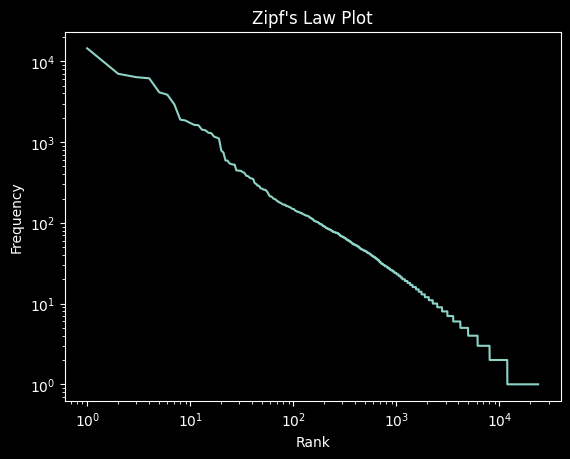

In [55]:
# Get the rank and frequency of each word
ranks = range(1, len(word_counts) + 1)
frequencies = word_counts

# Plot the rank and log frequency in log-log coordinates
plt.loglog(ranks, frequencies)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Law Plot")
plt.show()


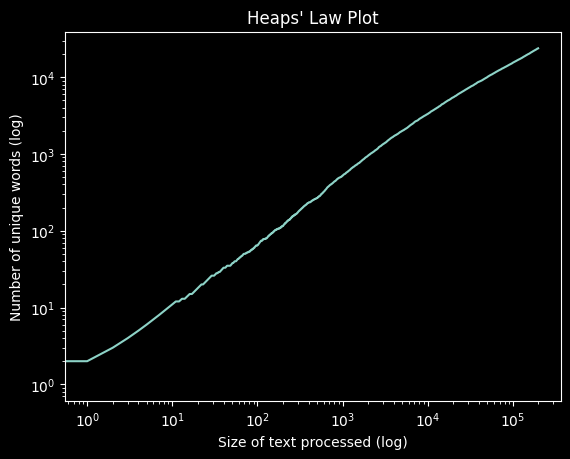

In [57]:
# Initialize the size of the text processed and the number of unique words
text_size = 0
unique_words = set()

# Initialize a list to store the counts of unique words
unique_word_counts = []

# Iterate over the words
for word in allWords: 
    text_size += 1
    unique_words.add(word)
    unique_word_counts.append(len(unique_words))

# Plot the logarithm of the size of the text processed and the logarithm of the number of unique words
plt.loglog(range(text_size), unique_word_counts)
plt.xlabel('Size of text processed (log)')
plt.ylabel('Number of unique words (log)')
plt.title("Heaps' Law Plot")
plt.show()